# Tables and plots for Schroeder 6.1


We have two Einstein solids, $A$ and $B$, which have $N_A$ and $N_B$ oscillators, respectively. The individual multiplicities of each solid are:
$$
        \Omega_A(N_A,q_A) = {q_A+N_A-1\choose q_A} = \frac{(q_A+N_A-1)!}{q_A!(N_A-1)!}
$$

$$
        \Omega_B(N_B,q_B) = {q_B+N_B-1\choose B_A} = \frac{(q_B+N_B-1)!}{q_B!(N_B-1)!}
$$

while the total multiplicity with $q_{\rm total} = q_A + q_B$ is
  $ \Omega_{\rm total} = \Omega_A \times \Omega_B$.


## Imports and function definitions

In [1]:
import numpy as np
import math
from scipy.special import comb
import matplotlib.pyplot as plt

In [2]:
def ein_mult(N, q):
    """
    Calculate the Einstein solid multiplicity and return it as
     an integer.
    """
    return int(comb(q + N -1, q))  

In [3]:
def ein_entropy_over_k(N, q):
    """
    Calculate the Einstein solid entropy divided by k (so just the
      ln of the multiplicity).
    """
    return np.log(np.float64(ein_mult(N,q)))  

In [4]:
def convert_int(my_int, large=10**6):
    """
    If my_int is larger than large, return an exponential form.
      The right justification for ints should be log10(large) + 1.
    """
    if my_int > large:
        return "{: .1e}".format(my_int)
    else:
        return "{:>8}".format(my_int)

In [5]:
def round_to_n(num, sigfigs):
    """
    Round off num to the specifie number of sigfigs (significant figures)
    """
    if num == 0:
        return num
    else:
        return round(num, -int(math.floor(math.log10(abs(num)))) + (sigfigs - 1))
    

In [6]:
def central_diff(array, index, delta=1):
    """
    Calculate the derivative of array at index by central difference
    """
    return (array[index + 1] - array[index - 1]) / (2 * delta)

In [7]:
def forward_diff(array, index, delta=1):
    """
    Calculate the derivative of array at index by forward difference
    """
    return (array[index + 1] - array[index]) / delta

In [8]:
def backward_diff(array, index, delta=1):
    """
    Calculate the derivative of array at index by backward difference
    """
    return (array[index] - array[index - 1]) / delta

In [9]:
def macrostate_table(N_A, N_B, q_tot, table=True, q_max=20):
    """
    Step through q_A and q_B = q_tot - q_A and use ein_mult 
      to find Omega_A and Omega_B.
    Total multiplicity from: Omega_tot = Omega_A * Omega_B
   
    Construct a table like in Schroeder with macrostates 
      and multiplicities for a system of two Einstein solids
      and return an array of Omega_tot values.
      
    If table=False, don't print the table but return the array
     of Omega_tot values.
    """
    if table:
        print(' q_A  Omega_A  S_A/k  T_A ',
              ' q_B  Omega_B   S_B/k T_B ',
              'Omega_tot S_tot/k')
    tot_microstates = 0
    # Collect values in arrays
    Omega_A_array = np.zeros(q_tot+1)  
    Omega_B_array = np.zeros(q_tot+1)  
    Omega_tot_array = np.zeros(q_tot+1)
    S_A_array = np.zeros(q_tot+1)  
    S_B_array = np.zeros(q_tot+1)  
    T_B_array = np.zeros(q_tot+1)
    S_tot_array = np.zeros(q_tot+1)
    
    for q_A in range(q_max+5):
        Omega_A_array[q_A] = ein_mult(N_A, q_A) 
        S_A_array[q_A] = ein_entropy_over_k(N_A, q_A) 
        
        q_B = q_tot - q_A
        Omega_B_array[q_A] = ein_mult(N_B, q_B) 
        S_B_array[q_A] = ein_entropy_over_k(N_B, q_B) 

        Omega_tot_array[q_A] = Omega_A_array[q_A] * Omega_B_array[q_A]
        tot_microstates += Omega_tot_array[q_A]
        S_tot_array[q_A] = np.log(np.float64(Omega_tot_array[q_A]))
        
    if table:
        eps = 0.1  # in eV --> maybe 0.01 eV would make more sense?
        kBoltz = 8.62e-5  # in eV/K
        eps_over_k = eps / kBoltz  # convert q to K
        for q_A in range(q_max+5):
            q_B = q_tot - q_A
            T_A = 0
            T_B = 0
            # Calculate derivatives by central or forward/backward differences
            if q_A > 0 and q_A < q_tot:
#                T_A = fac / central_diff(S_A_array, q_A) 
                T_B = -eps_over_k / central_diff(S_B_array, q_A) 
            elif q_A == 0:
#                T_A = fac / forward_diff(S_A_array, q_A) 
                T_B = -eps_over_k / forward_diff(S_B_array, q_A)               
            elif q_A == q_tot:
#                T_A = fac / backward_diff(S_A_array, q_A) 
                T_B = -eps_over_k / backward_diff(S_B_array, q_A) 
            T_B_array[q_A] = T_B
            T_A = round_to_n(T_A, 2)
            T_B = round_to_n(T_B, 2)
            print (f'{q_A:> 4} {convert_int(Omega_A_array[q_A])}  {S_A_array[q_A]:5.1f} {T_A:4.0f} ',
                   f'{q_B:> 4} {convert_int(Omega_B_array[q_A])}  {S_B_array[q_A]:5.1f} {T_B:4.0f}',
                   f'{convert_int(Omega_tot_array[q_A])}  {S_tot_array[q_A]:5.1f}')
        print(f'Total microstates = {convert_int(tot_microstates)}')

        return eps_over_k, S_A_array, S_B_array, T_B_array, S_tot_array

## Schroeder Table and Figures for Problem 6.1

The system has one oscillator ($N_A = 1$) while the reservoir has many ($N_B \gg N_A$). There are $q_{\text{tot}}$ total units of energy to divide between them.

### Table of multiplicities, entropies, and reservoir temperature

In [10]:
N_A = 1
N_B = 100
q_tot = 500
q_max = 20  # number of q_A values to print and plot

eps_over_k, S_A_array, S_B_array, T_B_array, S_tot_array = macrostate_table(N_A, N_B, q_tot, q_max=q_max)

 q_A  Omega_A  S_A/k  T_A   q_B  Omega_B   S_B/k T_B  Omega_tot S_tot/k
   0      1.0    0.0    0   500  1.9e+115  265.4 6400  1.9e+115  265.4
   1      1.0    0.0    0   499  1.5e+115  265.2 6400  1.5e+115  265.2
   2      1.0    0.0    0   498  1.3e+115  265.1 6400  1.3e+115  265.1
   3      1.0    0.0    0   497  1.1e+115  264.9 6400  1.1e+115  264.9
   4      1.0    0.0    0   496  9.0e+114  264.7 6400  9.0e+114  264.7
   5      1.0    0.0    0   495  7.5e+114  264.5 6400  7.5e+114  264.5
   6      1.0    0.0    0   494  6.2e+114  264.3 6400  6.2e+114  264.3
   7      1.0    0.0    0   493  5.2e+114  264.1 6300  5.2e+114  264.1
   8      1.0    0.0    0   492  4.3e+114  264.0 6300  4.3e+114  264.0
   9      1.0    0.0    0   491  3.6e+114  263.8 6300  3.6e+114  263.8
  10      1.0    0.0    0   490  3.0e+114  263.6 6300  3.0e+114  263.6
  11      1.0    0.0    0   489  2.5e+114  263.4 6300  2.5e+114  263.4
  12      1.0    0.0    0   488  2.1e+114  263.2 6300  2.1e+114  263.2
  13 

### First plot the total multiplicity as a function of $q_A$

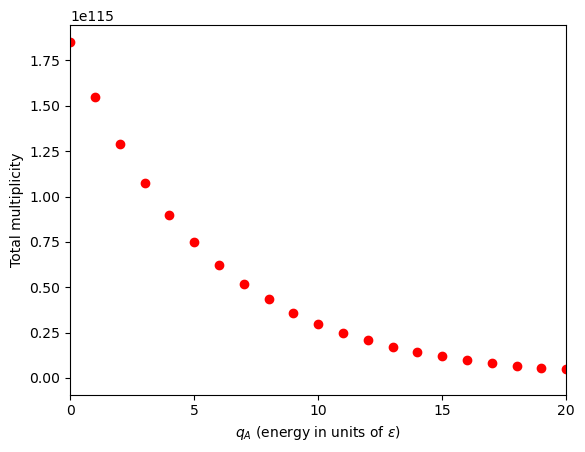

In [11]:
fig, ax0 = plt.subplots(1, 1)
q_array = np.arange(len(S_tot_array))
ax0.scatter(q_array, np.exp(S_tot_array), label=r'$\Omega_{\rm tot}$', color='red')

ax0.set_xlabel(r'$q_A$ (energy in units of $\varepsilon$)')
ax0.set_ylabel(r'Total multiplicity')
ax0.set_xlim(q_array[0], q_array[int(q_max)])
#ax0.set_ylim(np.floor(eS_tot_array[int(q_max)]), np.ceil(S_tot_array[0]))
ax0.set_xticks(np.arange(0, q_array[int(q_max)]+1, 5));
#fig.legend();

### Now plot the total entropy as a function of $q_A$

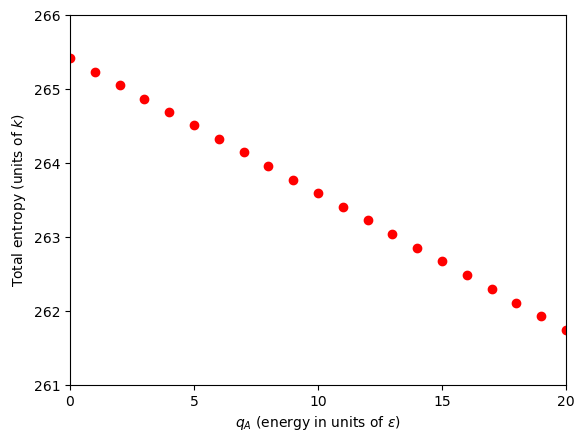

In [12]:
fig, ax0 = plt.subplots(1, 1)
q_array = np.arange(len(S_tot_array))
ax0.scatter(q_array, S_tot_array, label=r'$S_{\rm tot}$', color='red')

ax0.set_xlabel(r'$q_A$ (energy in units of $\varepsilon$)')
ax0.set_ylabel(r'Total entropy (units of $k$)')
ax0.set_xlim(q_array[0], q_array[int(q_max)])
ax0.set_ylim(np.floor(S_tot_array[int(q_max)]), np.ceil(S_tot_array[0]))
ax0.set_xticks(np.arange(0, q_array[int(q_max)]+1, 5));
#fig.legend();

### Repeat the last plot using a Boltzmann factor exponent as slope

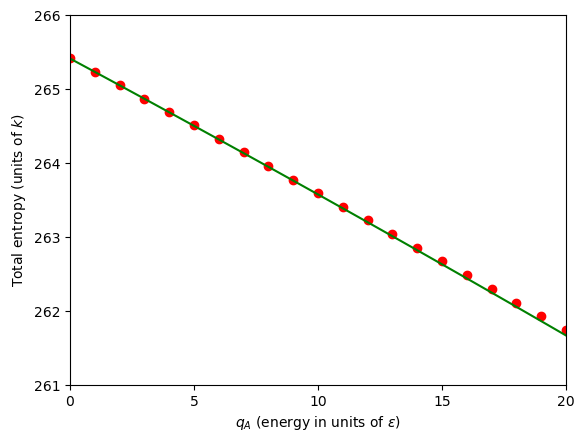

In [13]:
fig, ax0 = plt.subplots(1, 1)
q_array = np.arange(len(S_tot_array))
ax0.scatter(q_array, S_tot_array, label=r'$S_{\rm tot}$', color='red')
ax0.plot(q_array[0:q_max+1], S_tot_array[0] - eps_over_k/T_B_array[0:q_max+1]*q_array[0:q_max+1], color='green')

ax0.set_xlabel(r'$q_A$ (energy in units of $\varepsilon$)')
ax0.set_ylabel(r'Total entropy (units of $k$)')
ax0.set_xlim(q_array[0], q_array[int(q_max)])
ax0.set_ylim(np.floor(S_tot_array[int(q_max)]), np.ceil(S_tot_array[0]))
ax0.set_xticks(np.arange(0, q_array[int(q_max)]+1, 5));
#fig.legend();